# 手書き数字の機械学習体験

機械学習用ライブラリsklearnやその他必要なライブラリをインポート

In [1]:
from sklearn import datasets, svm
import numpy as np
import PIL
from PIL import Image

手書き数字のサンプルデータををloadします

In [2]:
digits = datasets.load_digits()

Xは機械学習用画像データ、yがターゲット

In [3]:
X=digits.data
y=digits.target

データのtypeと形を確認します

In [4]:
type(X)

numpy.ndarray

In [5]:
X.shape

(1797, 64)

In [6]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

→ 一つの画像データが64個の数字からなるベクトルとして表現されています

In [7]:
type(y)

numpy.ndarray

In [8]:
y.shape

(1797,)

In [9]:
y[0]

0

→ X[0]の画像データの表す数字が「0」であることを示しています。。<br>
このようなデータのペア（学習用数字画像データと正解の数字）が1797個用意されています

画像データをみてみましょう。可視化に必要なライブラリをインポートします

In [10]:
import matplotlib.pyplot as plt

画像データの一つを可視化してみます．<br>
64個の数字は数字は8×8のピクセルの「黒色の濃さ」を表しています．<br>
そのため，データの形を(8, 8)に変換してから可視化します．

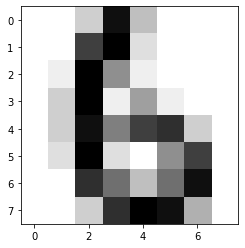

In [11]:
plt.imshow(X[234].reshape([8,8]),cmap=plt.cm.gray_r)
plt.show()

対応するターゲットを確認します

In [12]:
y[234]

6

画像データとターゲットを用いて**学習**します。ここでの学習方法にはsvmを用います。

In [13]:
clf=svm.SVC(C=1.0,kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

学習後にできた関数にXを代入して得られる「答え」をresultに代入します

In [14]:
result=clf.predict(X)

In [15]:
result

array([0, 1, 2, ..., 8, 9, 8])

正解のターゲットyを確認します

In [16]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
success=sum(result==y)

In [18]:
print("正解率")
print(100.0*success/len(y))

正解率
100.0


8x8のピクセルの手書き数字画像を準備し、読み込みます

In [19]:
#im = np.array(Image.open('/content/9.png'))

In [20]:
im = np.array(Image.open('/content/4a.png'))

読み込んだ画像データのサイズを確認します

In [21]:
im.shape

(8, 8, 4)

In [22]:
im[0]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [232, 232, 232, 255],
       [ 28,  28,  28, 255],
       [155, 155, 155, 255],
       [162, 162, 162, 255],
       [237, 237, 237, 255]], dtype=uint8)

→　読み込んだ画像データでは8x8の各ピクセルの情報が4つの数字で表されています

各ピクセルの4つの数字の先頭の数字のみを取り出します．

In [23]:
imm=im[:,:,0]

In [24]:
imm

array([[255, 255, 255, 232,  28, 155, 162, 237],
       [255, 255, 255,  71,  12, 183,   1, 191],
       [255, 248,  99,   0, 139, 191,   0, 192],
       [250,  51,   0,  82, 252, 191,   0, 145],
       [ 99,   0,   0,   1,   2,   0,   0,   0],
       [222, 194, 193, 194, 193, 146,   0,  97],
       [255, 255, 255, 255, 255, 192,   0, 128],
       [255, 255, 255, 255, 255, 205,  16, 193]], dtype=uint8)

学習用に用意された画像データに合わせて、読み込んだデータを変換します。

In [25]:
tmp=(imm-imm.min())  #　最小値を0、最大値を16の整数とするように変換します
tim=16-np.round(tmp/tmp.max()*16.0)
timf=np.stack([tim.flatten()]) # 学習用データと同様な1次元配列（ベクトル）にします

In [26]:
timf

array([[ 0.,  0.,  0.,  1., 14.,  6.,  6.,  1.,  0.,  0.,  0., 12., 15.,
         5., 16.,  4.,  0.,  0., 10., 16.,  7.,  4., 16.,  4.,  0., 13.,
        16., 11.,  0.,  4., 16.,  7., 10., 16., 16., 16., 16., 16., 16.,
        16.,  2.,  4.,  4.,  4.,  4.,  7., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.]])

手書き数字データを**学習後にできた関数**に代入してみます（正解が得られるでしょうか？）

In [27]:
clf.predict(timf)

array([4])

手書き数字を可視化してみます

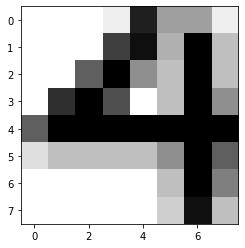

In [28]:
plt.imshow(timf.reshape([8,8]),cmap=plt.cm.gray_r)
plt.show()

学習用に使われたデータのサンプルを確認してみましょう

In [29]:
XX=X[y==4]

In [30]:
len(XX)

181

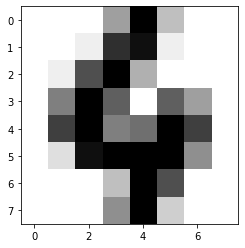

In [31]:
plt.imshow(XX[4].reshape([8,8]),cmap=plt.cm.gray_r)
plt.show()

In [32]:
XX[0].reshape([8,8])

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

In [33]:
images=[]
for i in range(0,12):
  images.append(XX[i].reshape([8,8]))

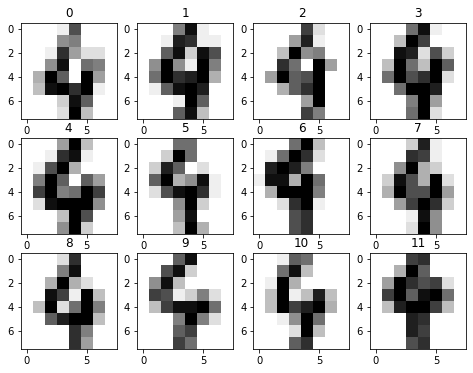

In [34]:
plt.rcParams["figure.figsize"] = (8,6)
fig = plt.figure()
for i, im in enumerate(images):
        fig.add_subplot(3,4,i+1).set_title(str(i))
        plt.imshow(im,cmap=plt.cm.gray_r)